In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### SALES

In [140]:
sales = pd.read_csv("ventas.csv")
sales.head()

,CustomerId,material,calmonth,uni_box
0,499920078,9151,201909,0.4364
1,499920078,2287,201909,3.1701
2,499920078,4526,201909,0.2818
3,499920078,14050,201909,0.2642
4,499920078,1333,201909,2.1134


In [141]:
sales['calmonth'] = sales['calmonth'].astype(str)
grouped_sales_cal = sales.groupby('calmonth', as_index=False)['uni_box'].sum()
grouped_sales_cal['month'] = grouped_sales_cal['calmonth'].str.slice(start=4)
sorted_sales_cal = grouped_sales_cal.sort_values(by='uni_box', ascending=False)

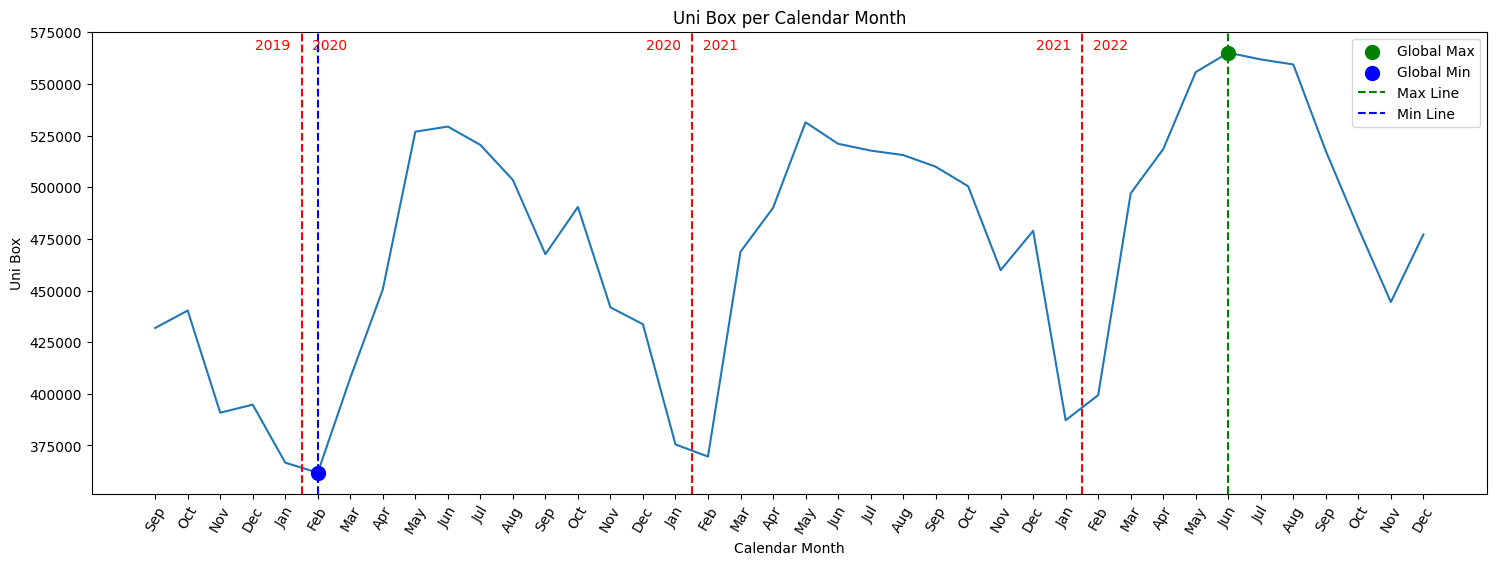

In [156]:
custom_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
                 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 
                 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(18, 6))

sns.lineplot(data=grouped_sales_cal, x='calmonth', y='uni_box')

plt.xlabel('Calendar Month')
plt.ylabel('Uni Box')
plt.title('Uni Box per Calendar Month')

plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=60)

years = ['2019     2020', '2020     2021', '2021     2022']
positions = [4.5, 16.5, 28.5]

for pos, year in zip(positions, years):
    plt.axvline(x=pos, color='red', linestyle='--')
    plt.text(pos, max(grouped_sales_cal['uni_box']) + 1, year, ha='center', va='bottom', color='red')

max_value = grouped_sales_cal['uni_box'].max()
min_value = grouped_sales_cal['uni_box'].min()
max_index = grouped_sales_cal['uni_box'].idxmax()
min_index = grouped_sales_cal['uni_box'].idxmin()

plt.scatter(max_index, max_value, color='green', s=100, zorder=5, label='Global Max')
plt.scatter(min_index, min_value, color='blue', s=100, zorder=5, label='Global Min')

plt.axvline(x=max_index, color='green', linestyle='--', label='Max Line')
plt.axvline(x=min_index, color='blue', linestyle='--', label='Min Line')

plt.legend()
plt.show()


In [143]:
sorted_sales_cal.head()

,calmonth,uni_box,month
33,202206,565117.091511,06
34,202207,561868.449511,07
35,202208,559438.874553,08
32,202205,555723.639381,05
20,202105,531442.839607,05


In [144]:
sorted_sales_cal.tail()

,calmonth,uni_box,month
28,202201,387190.404273,01
16,202101,375496.033193,01
17,202102,369594.873256,02
4,202001,366640.204675,01
5,202002,361786.590159,02


In [145]:
sorted_sales_month = sorted_sales_cal.groupby('month', as_index=False)['uni_box'].sum()

month_counts = sorted_sales_cal["month"].value_counts().sort_index().reset_index()
month_counts.columns = ['month', 'count']

sorted_sales_month = sorted_sales_month.merge(month_counts, on='month')
sorted_sales_month.set_index("month")


,uni_box,count
month,,
01,1.129327e+06,3
02,1.130741e+06,3
03,1.373456e+06,3
04,1.458934e+06,3
05,1.614059e+06,3
06,1.615511e+06,3
07,1.600086e+06,3
08,1.578520e+06,3
09,1.926889e+06,4


In [146]:
sorted_sales_month["avg"] = sorted_sales_month["uni_box"] / sorted_sales_month["count"]
sorted_sales_month = sorted_sales_month.sort_values(by='avg', ascending=False)
sorted_sales_month

,month,uni_box,count,avg
5,06,1.615511e+06,3,538503.826793
4,05,1.614059e+06,3,538019.796374
6,07,1.600086e+06,3,533362.043686
7,08,1.578520e+06,3,526173.427475
3,04,1.458934e+06,3,486311.378184
8,09,1.926889e+06,4,481722.236122
9,10,1.911452e+06,4,477862.923157
2,03,1.373456e+06,3,457818.705791
11,12,1.784340e+06,4,446084.901171
10,11,1.736933e+06,4,434233.371568


### Customers

In [147]:
customers = pd.read_csv("customers_sampled.csv")
customers.head()

,CustomerId,pc_agr_300m,pc_comercial_300m,pc_generales_300m,pc_habitacional_300m,pc_habitacional_mixta_300m,pc_industrial_300m,pc_minero_300m,pc_mixta_300m,pc_negocios_300m,...,velocidad_hora_19,velocidad_hora_20,velocidad_hora_21,velocidad_hora_22,velocidad_hora_23,accesibilidad,socioeconomic_status_rgm,industry_customer_size,rgm_channel,sub_canal_comercial
0,499920078,0.0,0.00,6.11,48.40,37.71,6.28,0.0,0.0,0.0,...,24.0,24.0,26.0,17.0,11.0,0.184550,HOGAR,3,TRADICIONAL,Estanquillos / kioscos
1,499920499,0.0,0.00,0.00,89.38,6.39,4.23,0.0,0.0,0.0,...,22.0,34.0,60.0,10.0,6.0,0.265247,TRANSITO,4,TRADICIONAL,Abarrotes / Almacenes / Bodegas / Víveres
2,499921473,0.0,1.17,15.51,66.28,16.65,0.39,0.0,0.0,0.0,...,40.0,40.0,28.0,20.0,29.0,0.191479,HOGAR,5,TRADICIONAL,Estanquillos / kioscos
3,499921557,0.0,0.00,81.14,16.57,1.99,0.00,0.0,0.0,0.0,...,30.0,40.0,13.0,40.0,32.0,0.251428,TRANSITO,5,TRADICIONAL,Abarrotes / Almacenes / Bodegas / Víveres
4,499921908,0.0,0.00,0.00,100.00,0.00,0.00,0.0,0.0,0.0,...,13.0,30.0,30.0,30.0,30.0,0.276372,HOGAR,4,TRADICIONAL,Estanquillos / kioscos


In [148]:
customers["sub_canal_comercial"].value_counts()

Abarrotes / Almacenes / Bodegas / Víveres        586
Estanquillos / kioscos                           570
Hogar con Venta                                  439
Cerveza y Licores                                173
Frutas y Verduras                                 50
Farmacia Independiente                            46
Carnicería / Pollería / Pescadería                44
Tortillería                                       32
Minisuper / Minimarket                            28
Tiendas de Alimentos Especializados Orgánicos     28
Panadería / Pastelería                            18
Mayorista Abarrotero                              17
TDC/Proximidad Independiente                      10
Name: sub_canal_comercial, dtype: int64